In [1]:
from jax.config import config
config.update("jax_enable_x64", True)

from matplotlib import colors, pyplot as plt
import jax.numpy as np
from jax import jit

In [2]:
from dLuxWebbpsf import NIRCamCoron

In [3]:
webb_options = {
    'jitter': None,   # jitter model name or None
    'jitter_sigma': 0.000,  # in arcsec per axis, default 0.007
    'add_distortion': False,
}

In [4]:
optics = NIRCamCoron(filter = "F300M",
                     pupil_mask = "CIRCLYOT",
                     coron_mask = "MASK430R",
                     detector = "NRCA5",
                     aperture = "NRCA5_FULL_MASK430R",
                     fft_oversample=4,
                     options=webb_options)

opd_ref_focus: {} 6.714345736893632e-08
tilt_ref_offset: {} 5.412406381286715e-08


In [5]:
wavels = [2.82792251169004e-06, 2.86973947895791e-06, 2.91155644622578e-06, 2.95337341349365e-06, 2.99519038076152e-06, 3.03700734802939e-06, 3.07882431529726e-06, 3.12064128256513e-06, 3.162458249833e-06]
weights = [0.07539524673822835, 0.1463757342098521, 0.1418869189176053, 0.1323195735559042, 0.1244245775928443, 0.1158243830474879, 0.1103851826070876, 0.1080329296316232, 0.04535545369936722]

In [6]:
%%time
print("Modelling optics...")
psf = optics.propagate(wavels, weights=weights)
print("Modelling optics...ok")
psf_norm = psf/psf.sum()



Modelling optics...


: 

: 

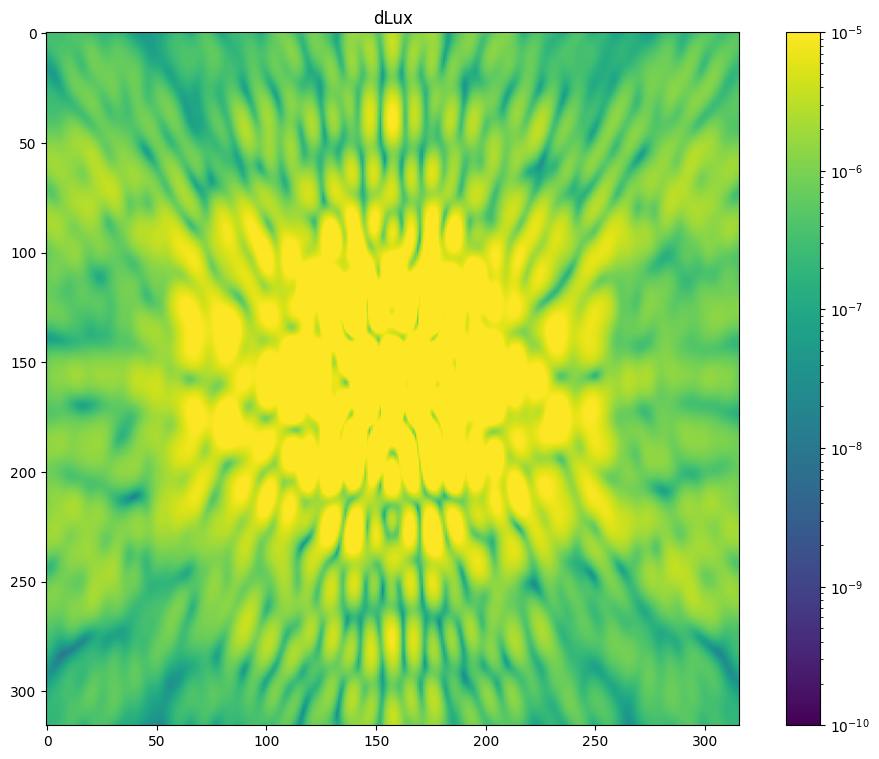

In [7]:
norm = colors.LogNorm(vmin=1e-10, vmax=1e-5)
vmin = 1e-10
vmax = 1e-5
ticks = np.logspace(np.log10(vmin), np.log10(vmax), int(np.round(np.log10(vmax / vmin) + 1)))

plt.figure(figsize=(12, 9))

plt.title("dLux")
plt.imshow(psf_norm, norm=norm)
bar2 = plt.colorbar()